# Book Recommender System

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
ratings = pd.read_csv(r'https://raw.githubusercontent.com/Gajam-Anurag/cmpe255-spring22-project/main/src/Datasets/Book-Ratings.csv', delimiter=';', error_bad_lines=False, encoding='ISO-8859-1')
books = pd.read_csv(r'https://raw.githubusercontent.com/Gajam-Anurag/cmpe255-spring22-project/main/src/Datasets/Books.csv',delimiter=';', error_bad_lines=False, encoding='ISO-8859-1')
users = pd.read_csv(r'https://raw.githubusercontent.com/Gajam-Anurag/cmpe255-spring22-project/main/src/Datasets/Users.csv', delimiter=';', error_bad_lines=False, encoding='ISO-8859-1')

C:\Users\gajam\AppData\Local\Temp\ipykernel_32952\1415335198.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  ratings = pd.read_csv(r'https://raw.githubusercontent.com/Gajam-Anurag/cmpe255-spring22-project/main/src/Datasets/Book-Ratings.csv', delimiter=';', error_bad_lines=False, encoding='ISO-8859-1')
C:\Users\gajam\AppData\Local\Temp\ipykernel_32952\1415335198.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  books = pd.read_csv(r'https://raw.githubusercontent.com/Gajam-Anurag/cmpe255-spring22-project/main/src/Datasets/Books.csv',delimiter=';', error_bad_lines=False, encoding='ISO-8859-1')
b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping lin

In [3]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


# Data Preprocessing

### Books Data Preprocessing

In [4]:
## Printing columns and head part of books dataframe

print(books.columns)
books.head()

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
### As we don't require the url columns in the books dataframe, we will drop those columns 
books = books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1)
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [6]:
## Next we check for the null values in books dataframe

books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [7]:
## before droping lets check the rows which are null 

books[books['Publisher'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [8]:
books[books['Book-Author'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [9]:
## dropping the Nan values as the percertage of null values is minimum

books.dropna(inplace=True)

In [10]:
## checking the column year-of-publication 

books['Year-Of-Publication'].unique()


array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [11]:
## checking the characters values in Year of publication

books[books['Year-Of-Publication'].isin(['DK Publishing Inc','Gallimard'])]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [12]:
### here the values are misplaced. We will try to fix this 

books.loc[209538 ,'Publisher'] = 'DK Publishing Inc'
books.loc[209538 ,'Year-Of-Publication'] = 2000
books.loc[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
books.loc[209538 ,'Book-Author'] = 'Michael Teitelbaum'

books.loc[221678 ,'Publisher'] = 'DK Publishing Inc'
books.loc[221678 ,'Year-Of-Publication'] = 2000
books.loc[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
books.loc[209538 ,'Book-Author'] = 'James Buckley'

books.loc[220731 ,'Publisher'] = 'Gallimard'
books.loc[220731 ,'Year-Of-Publication'] = 2003
books.loc[209538 ,'Book-Title'] = 'Peuple du ciel - Suivi de Les bergers '
books.loc[209538 ,'Book-Author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'

In [13]:
## then converting into int datatype

books['Year-Of-Publication'] = books['Year-Of-Publication'].astype('int')

In [14]:
## checking the distribution of the data 

print(books['Year-Of-Publication'].sort_values().unique())

[   0 1376 1378 1806 1897 1900 1901 1902 1904 1906 1908 1909 1910 1911
 1914 1917 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930
 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944
 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958
 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972
 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986
 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000
 2001 2002 2003 2004 2005 2006 2008 2010 2011 2012 2020 2021 2024 2026
 2030 2037 2038 2050]


<AxesSubplot:xlabel='Year-Of-Publication'>

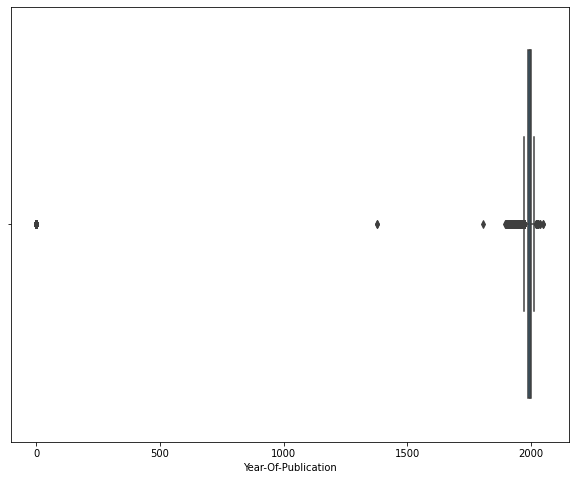

In [16]:
## plotting boxplot 

plt.figure(figsize=(10,8))
sns.boxplot(x = 'Year-Of-Publication', data=books)

In [17]:
## from the above we can see there are outliers, In this step we are replacing outliers with the mode values 

books.loc[((books['Year-Of-Publication'] < 1800) | (books['Year-Of-Publication'] > 2022)) , 'Year-Of-Publication'] = books['Year-Of-Publication'].mode()[0]

In [18]:
## droping all the duplicates and resetting the index 

books.drop_duplicates(keep='last', inplace=True) 
books.reset_index(drop = True, inplace = True)
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [19]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271357 entries, 0 to 271356
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271357 non-null  object
 1   Book-Title           271357 non-null  object
 2   Book-Author          271357 non-null  object
 3   Year-Of-Publication  271357 non-null  int32 
 4   Publisher            271357 non-null  object
dtypes: int32(1), object(4)
memory usage: 9.3+ MB


In [20]:
## Uppercasing all alphabets in ISBN
books['ISBN'] = books['ISBN'].str.upper()

books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
